In [1]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


##### Noisy gradient $$x_{k+1}=x_k-h\nabla g(x_k), h=\frac{1+\beta}{L(1-\beta)^2}, \|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [2]:
def generate_data(size):
    A = np.random.randn(size,size)
    x = np.random.randn(size)
    b = A.dot(x)
    AA=2*A.T.dot(A)
    Ab=2*A.T.dot(b)
    return A, b, x, AA, Ab

def f(x):
    global A, b
    return norm(A@x  - b) ** 2
    
def grad_f(x):
    global AA, Ab
    return AA.dot(x) - Ab 

def def_alpha():
    global AA
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(AA)
    return max(eigenvalues), min(eigenvalues)
    
def grad_descent(beta, eps):
    global x, size
    f_solution = f(x)
    alpha, mu = def_alpha() 
    print (alpha,mu)
    H = (1 - beta) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    print(f(cur_x))
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        norm_vector = beta * norm(grad_f(cur_x))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - H * (grad_f(cur_x) + normalize_vector)
    steps.append([cur_x, f(cur_x)])
    return np.array(steps)

In [6]:
size = 100
A,b,x, AA, Ab = generate_data(size)
betta, eps = 0.1, 0.001

In [4]:
steps = grad_descent(betta,eps)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

766.9092908559508 0.0016374867939374681
21051.17446886883
x_solution =  [ 0.22690411 -0.09524423 -0.58373949 -0.76816183 -0.53440944 -1.28598268
 -0.69371537  2.20764915  1.02410321  0.28255552  0.84548864  0.51394014
  1.23282663 -0.79566559 -0.63451915  0.62732359  0.58783089  0.18620064
 -1.19023891 -1.36859002  0.11059485 -0.52111665  1.47033214 -1.42342849
 -2.07227592 -0.23541192 -0.61663964 -0.87218907 -0.73269774 -0.377147
  1.8447891   0.74864475  0.92071505  0.79513866 -1.72319152 -0.12981062
 -0.81408254  0.00524414  0.08733669 -0.12249117 -1.22497229 -2.19882674
  0.66915453  0.54612034  0.22608762  0.62881298 -0.52142652 -0.95113945
 -1.34410781  0.97610356 -0.49878455 -0.76702812  0.38290364 -0.16283921
  0.34034608 -0.25808452  0.35367223 -1.65767294  0.13727051 -0.13664321
 -0.43731121  0.23576302  0.38134152 -0.86227732 -0.76721912 -0.62042916
 -1.00507312  2.32773562 -0.62975902 -0.14221809 -0.99220544  0.53488578
  0.8502568   0.39828011 -1.87053664  0.70826289 -1.35

In [7]:
print('count of steps = %d'%steps.shape[0])

count of steps = 41750


In [8]:
print(x) 

[-0.87064058  0.13117175  0.72948239  1.29514408 -1.82947954 -1.00210243
 -0.61600861  1.51427964 -0.33233616  1.38072114  1.21718883  0.55492559
 -0.23022413 -0.10072931  0.60796999 -0.02264603 -0.66511307 -1.61524701
  0.71927768 -1.86932899 -0.60312651 -0.40099219  0.63878412  0.56836495
  1.004341   -0.46567797 -0.93244435  0.7491725   0.27721485 -0.99562355
 -1.99109919  0.02823363  1.12532032 -0.68841315 -2.05927766 -0.14857445
  1.87219525  1.32562976  1.10904001  0.93002371  2.11948518  0.17423628
 -0.78025046  0.38509381 -0.65367863  0.8961086  -0.24630801  1.39284709
  0.9852919  -0.53506962 -0.65302028 -1.16337278 -2.05083831  0.72846852
 -1.07984688  0.60280206 -1.74497171  1.15774899  0.18580342 -0.40006116
 -1.87706357 -0.58635903  0.37454038  0.47567087 -0.09888481 -0.45707382
 -0.1979458  -0.18648427 -1.1488933  -1.57931631 -0.85726258  1.03616377
  1.33244589 -0.77990224 -0.07663442  0.71053534  0.36240346 -0.91405206
 -0.99808328  0.18220949 -1.25639297  0.79620637 -1

In [58]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,step in enumerate(steps):
    file.write('%d \t %f \n'%(i, step[1]))

Text(0, 0.5, 'f(cur_x)')

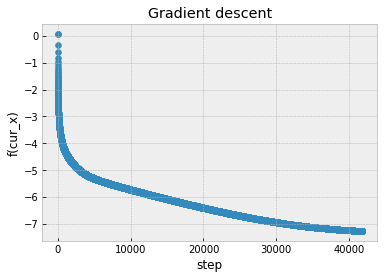

In [9]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')

#### Fast Gradient $$ x^{md}_k=\beta_k^{-1}x_k+(1-\beta_k^{-1})x_k^{ag} $$ $$x_{k+1}=x_k-\gamma_k\nabla f(x_k^{md}) $$$$x_{k+1}^{ag}=\beta_k^{-1}x_{k+1}+(1-\beta_k^{-1})x_k^{ag} $$$$\beta_k=\dfrac{k+1}{2},\gamma_k=\dfrac{k+1}{4L} $$

In [10]:
def fast_grad_descent(eps):
    global x, size
    f_solution = f(x)
    beta = 1
    alpha, _ = def_alpha()
    gamma = 1 / (2 * alpha) 
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    cur_x_ag = np.ones(size)
    cur_x_md = np.ones(size)
    cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    step_k = 1
    steps = [[cur_x, f(cur_x_ag)]]
    # итерация цикла -- шаг градиентнго спуска
    while f(cur_x_ag) - f_solution > eps:
        step_k += 1
        steps.append([cur_x, f(cur_x_ag)])
        beta = (step_k + 1) / 2
        gamma = (1 + step_k) / (4 * alpha)
        cur_x = cur_x - gamma * grad_f(cur_x_md)
        cur_x_ag = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
        cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    steps.append([cur_x_ag, f(cur_x_ag)])
    return np.array(steps)

In [11]:
steps = fast_grad_descent(eps)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

x_solution =  [-0.86157203  0.12773166  0.72594949  1.30657369 -1.83382795 -1.00995042
 -0.61343661  1.51553483 -0.3374271   1.36957406  1.2178595   0.54712951
 -0.2262223  -0.10744195  0.60809416 -0.04039804 -0.65949387 -1.61087718
  0.72521737 -1.88073022 -0.61063933 -0.40075079  0.63600608  0.56220705
  1.01056644 -0.45721653 -0.9246961   0.75356556  0.27755569 -1.01126721
 -2.00106477  0.03648708  1.12478543 -0.69547393 -2.0519258  -0.14979474
  1.8624375   1.32685696  1.11579551  0.93543188  2.12731604  0.17975763
 -0.79301377  0.3855581  -0.64632117  0.88288676 -0.23982446  1.39615804
  0.98322053 -0.52899465 -0.65443045 -1.15665733 -2.05330333  0.7218224
 -1.07526083  0.59277914 -1.73339818  1.16765348  0.17958703 -0.38125818
 -1.87352499 -0.59271514  0.38496862  0.47925003 -0.10619542 -0.45364966
 -0.20864511 -0.18753418 -1.1386274  -1.57615156 -0.86573091  1.04547139
  1.34321027 -0.77930789 -0.09113545  0.7085489   0.36790103 -0.90018057
 -0.99422142  0.19099183 -1.25297657  

In [12]:
print('count of steps = %d'%steps.shape[0])

count of steps = 581


Text(0, 0.5, 'f(cur_x)')

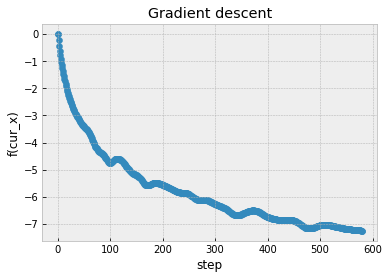

In [13]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')

#### Fast Noizy Gradient

 $$ x^{md}_k=\beta_k^{-1}x_k+(1-\beta_k^{-1})x_k^{ag} $$ $$x_{k+1}=x_k-\gamma_k g(x_k^{md}) $$$$x_{k+1}^{ag}=\beta_k^{-1}x_{k+1}+(1-\beta_k^{-1})x_k^{ag} $$ $$\beta_k=\dfrac{k+1}{2},\gamma_k=\dfrac{k+1}{4L} $$


 where $$\|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [14]:
def fast_noisy_grad_descent(eps, betta):
    global x, size
    f_solution = f(x) 
    beta = 1
    alpha, _ = def_alpha()
    gamma = 1 / (2 * alpha) 
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(size)
    cur_x_ag = np.ones(size)
    cur_x_md = np.ones(size)
    cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    step_k = 1
    steps = [[cur_x, f(cur_x_ag)]]
    # итерация цикла -- шаг градиентнго спуска
    while f(cur_x_ag) - f_solution > eps:
        step_k += 1
        steps.append([cur_x, f(cur_x_ag)])
        beta = (step_k + 1) / 2
        gamma = (1 + step_k) / (4 * alpha)
        norm_vector = betta * norm(grad_f(cur_x_md))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - gamma * (grad_f(cur_x_md) + normalize_vector)
        cur_x_ag = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
        cur_x_md = 1 / beta * cur_x + (1 - 1 / beta) * cur_x_ag
    steps.append([cur_x_ag, f(cur_x_ag)])
    return np.array(steps)

In [15]:
betta=0.2
steps = fast_noisy_grad_descent(eps, betta)
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

x_solution =  [-0.86782998  0.12593022  0.73311297  1.28193053 -1.81971835 -0.99421504
 -0.60562376  1.51812385 -0.3238996   1.40079796  1.21712788  0.54496336
 -0.20271609 -0.09824429  0.61138676 -0.0211684  -0.6748456  -1.62107957
  0.70965715 -1.8267713  -0.58513469 -0.40286319  0.63283124  0.58098155
  1.02327778 -0.4733597  -0.93547454  0.76163339  0.27379706 -0.97700851
 -1.98865076  0.02676729  1.13928084 -0.68400803 -2.06721843 -0.13616952
  1.8809816   1.32441162  1.0914148   0.91272193  2.10927923  0.1596259
 -0.7814394   0.37305551 -0.65989993  0.9175584  -0.24340495  1.3975494
  0.98936806 -0.53607729 -0.67173803 -1.16232646 -2.05482152  0.72757038
 -1.08727299  0.62441047 -1.74641483  1.15333075  0.18329012 -0.40480889
 -1.89202612 -0.59614268  0.36658309  0.47335704 -0.09852569 -0.46292044
 -0.20112793 -0.17259993 -1.15434581 -1.58604272 -0.86189336  1.02746739
  1.31618742 -0.78524775 -0.06843432  0.72135249  0.34907818 -0.94137247
 -1.00449685  0.17493706 -1.25574312  0

In [16]:
print('count of steps = %d'%steps.shape[0])

count of steps = 583


In [17]:
print(x) 

[-0.87064058  0.13117175  0.72948239  1.29514408 -1.82947954 -1.00210243
 -0.61600861  1.51427964 -0.33233616  1.38072114  1.21718883  0.55492559
 -0.23022413 -0.10072931  0.60796999 -0.02264603 -0.66511307 -1.61524701
  0.71927768 -1.86932899 -0.60312651 -0.40099219  0.63878412  0.56836495
  1.004341   -0.46567797 -0.93244435  0.7491725   0.27721485 -0.99562355
 -1.99109919  0.02823363  1.12532032 -0.68841315 -2.05927766 -0.14857445
  1.87219525  1.32562976  1.10904001  0.93002371  2.11948518  0.17423628
 -0.78025046  0.38509381 -0.65367863  0.8961086  -0.24630801  1.39284709
  0.9852919  -0.53506962 -0.65302028 -1.16337278 -2.05083831  0.72846852
 -1.07984688  0.60280206 -1.74497171  1.15774899  0.18580342 -0.40006116
 -1.87706357 -0.58635903  0.37454038  0.47567087 -0.09888481 -0.45707382
 -0.1979458  -0.18648427 -1.1488933  -1.57931631 -0.85726258  1.03616377
  1.33244589 -0.77990224 -0.07663442  0.71053534  0.36240346 -0.91405206
 -0.99808328  0.18220949 -1.25639297  0.79620637 -1

Text(0, 0.5, 'f(cur_x)')

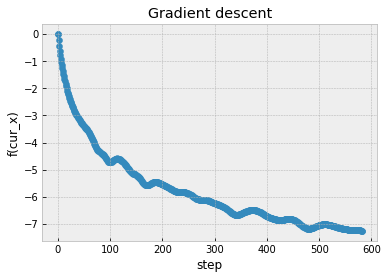

In [18]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution),10) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')